# Measuring the performance of `prefetch()`

Youtube:

https://www.youtube.com/watch?v=MLEKEplgCas&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=45

Tensorflow Documentation:

https://www.tensorflow.org/guide/data_performance#caching

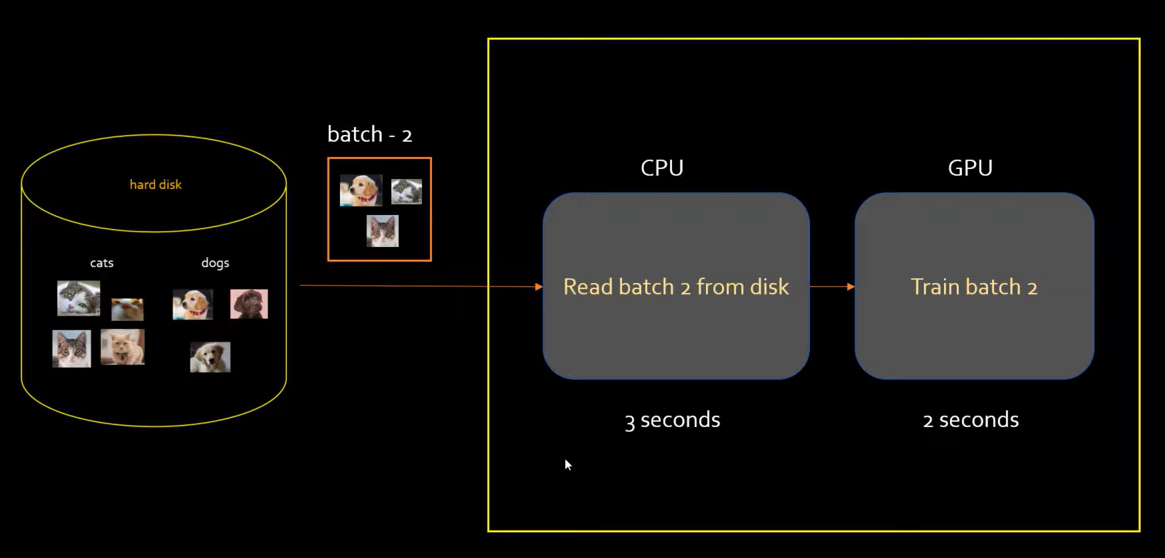

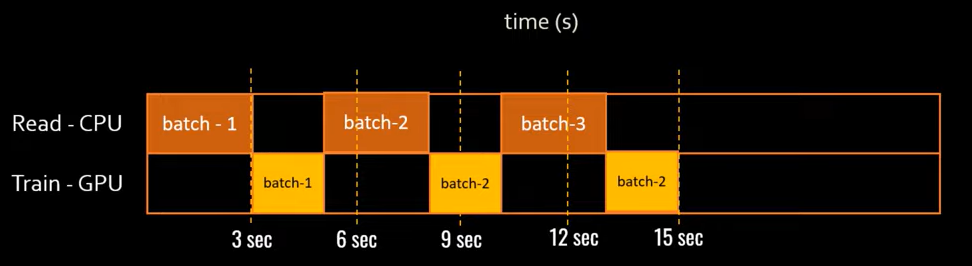

Optimizing CPU time by `prefetch()`

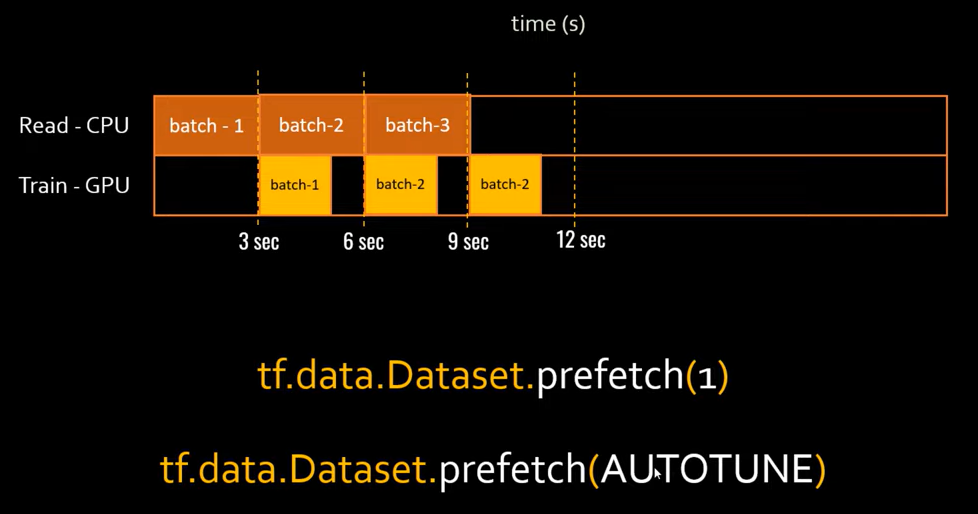

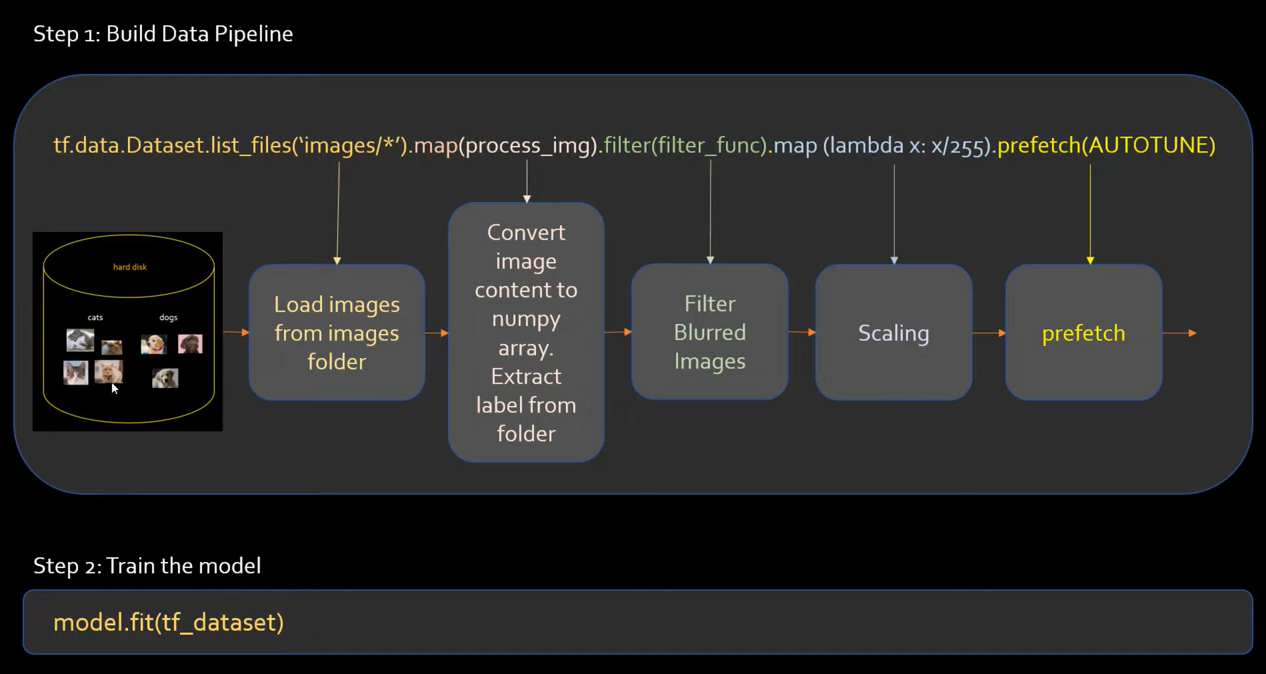

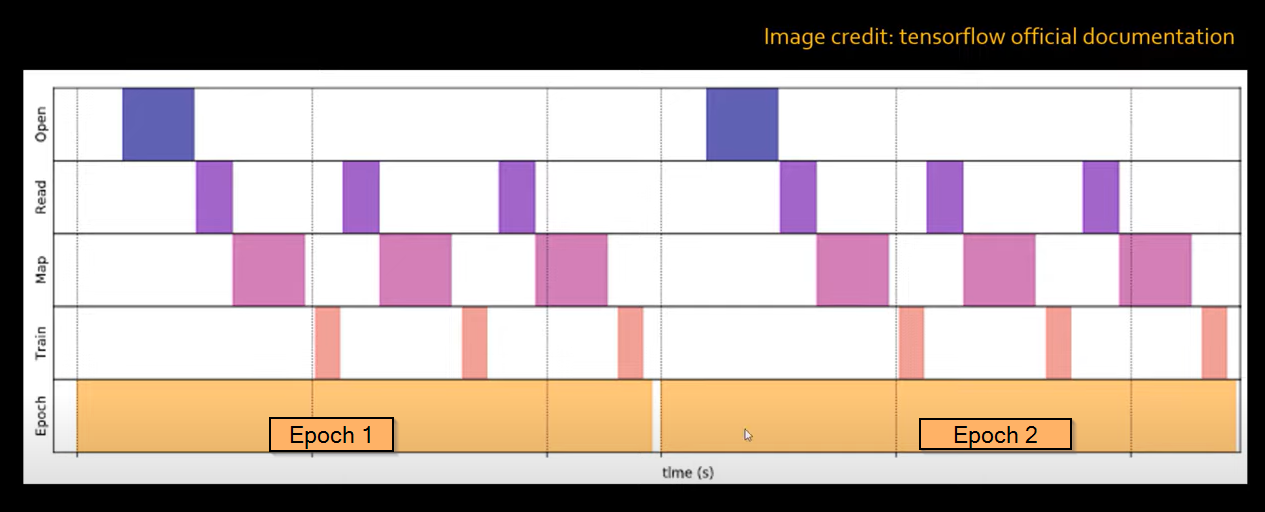

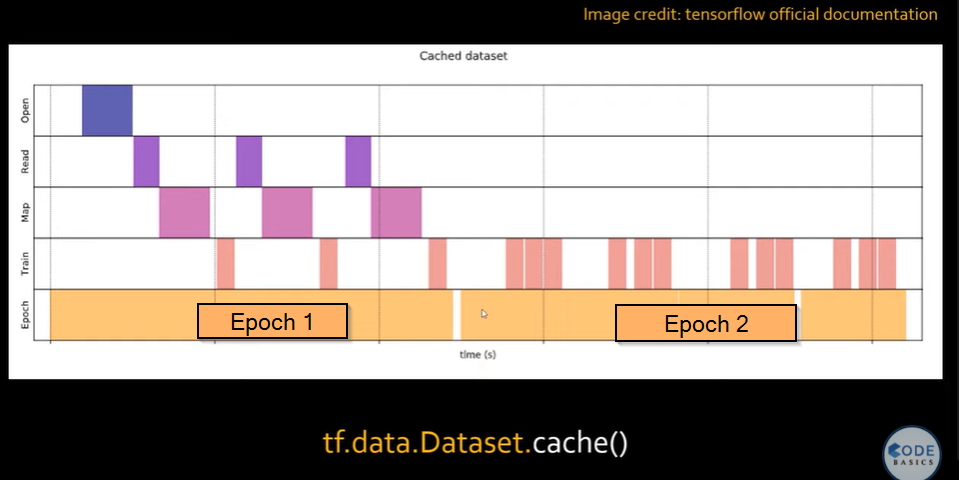

In [3]:
import tensorflow as tf
import time

In [2]:
tf.__version__

'2.11.0'

https://stackoverflow.com/questions/37837682/python-class-input-argument

```
class name(object):
  def __init__(self, name):
    print name
```
This means that the class inherits the base class called "object"

In [8]:
# dummy function to mimich file reading in real time

# base class tensorflow Dataset
class FileDataset(tf.data.Dataset):
  def read_files_in_batches(num_samples):
    # open file
    time.sleep(0.03) # mimicking the time that takes to open the file in real-time

    for sample_idx in range(num_samples):
      time.sleep(0.015) # delay to read one line from the file
      yield(sample_idx) # returning that batch
    
  # overriding new method
  # cls is the class reference to tf.data.Dataset
  def __new__(cls):
    tf.data.Dataset.from_generator(cls.read_files_in_batches,  
                                   output_signature=tf.TensorSpec(shape=(1,), dtype=tf.int64),
                                   args=(num_samples)
                                   )
       

In [9]:
def benchmark(dataset, num_epochs=2):
  for epoch_num in range(num_epochs):
    for sample in dataset:
      time.sleep(0.01)